### Метрики качества классификации.

Сегодня мы научимся использовать различные метрики для оценки качества моделей.

Для начала загрузим данные с предыдущей домашней задачи с небольшим `сюрпризом`. 

In [7]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
import matplotlib as mlp
import matplotlib.pyplot as plt

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек
mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
data = pd.read_csv("processed_train.csv")

In [3]:
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


Один из гномов очень завидовал своим братьям, переплюнувшим его по `accuracy` в бонусном задании предыдущей домашней работы. Поэтому совершил следующее злодеяние: выкинул кучу объектов таким образом, чтобы баланс классов нарушился! 

`Может, accuracy у них станет еще больше, зато преподаватель их отругает, ведь использовать accuracy при дисбалансе не очень-то хорошо!` - подумал гном

Замерьте количество объектов в порченном датафрейме.
В какой пропорции соотносятся классы теперь?

In [5]:
### Your code is here
data['HasDetections'].value_counts()

HasDetections
0    99940
1    20012
Name: count, dtype: int64

Произведем процедуру отложенной выборки:

In [8]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1)

Обучите логистическую регрессию с параметром `l2` регуляризации `C = 0.01` на порченном датасете.
Замерьте долю верно классифицированных объектов на трейне и на тесте. Можете использовать абсолютно любые конструкции, главное не забыть пронормировать данные с помощью `StandardScaler`

In [23]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(penalty='l2', C=0.01))
])

cv_result_pipe = cross_validate(pipe, X, y, scoring='accuracy',
                                cv=custom_cv, return_train_score=True)

print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")

Accuracy на трейне: 0.841
Accuracy на тесте: 0.842


In [25]:
from sklearn.metrics import confusion_matrix

pipe.fit(X_train, y_train)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, pipe.predict(X_train)).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, pipe.predict(X_test)).ravel()

print(f'True Negative errors: {tn_train}')
print(f'False Positive errors: {fp_train}')
print(f'False Negative errors: {fn_train}')
print(f'True Positive errors: {tp_train}\n ')

print(f'True Negative errors: {tn_test}')
print(f'False Positive errors: {fp_test}')
print(f'False Negative errors: {fn_test}')
print(f'True Positive errors: {tp_test}')

True Negative errors: 74041
False Positive errors: 880
False Negative errors: 13403
True Positive errors: 1640
 
True Negative errors: 24727
False Positive errors: 292
False Negative errors: 4442
True Positive errors: 527


Кажется, что, по сравнению с результатами в предыдущей домашней работе, мы построили куда более сильную модель. Но мы сильно заблуждаемся, если в это верим!

**Задание 2.**
Для бинарной классификации можно построить так называемую **confision matrix** (матрица ошибок), которая подсчитывает количество правильных и неправильных предсказаний и разделяет их по двум классам:

|          | a(x) = -1  | a(x) = +1  |
|----------|------------|------------|
|  y = -1  |     TN     |     FP     |
|  y = +1  |     FN     |     TP     |

* Positive/Negative отражает то, к какому классу определила объект наша модель $a(x)$, в нашем случае нулевой класс соответствует Negative (нет вируса), а единичный класс - Positive (есть вирус).

* True/False просто показывает совпало ли предсказание модели с реальным классом объекта, поэтому на главной диагонали стоят True, а на побочной False.

**2.1)** Постройте вручную матрицу ошибок на тестовой выборке, используя реальные и предсказанные вашей моделью метки классов. Потом сравните результат с методом `confusion_matrix` в `sklearn`.

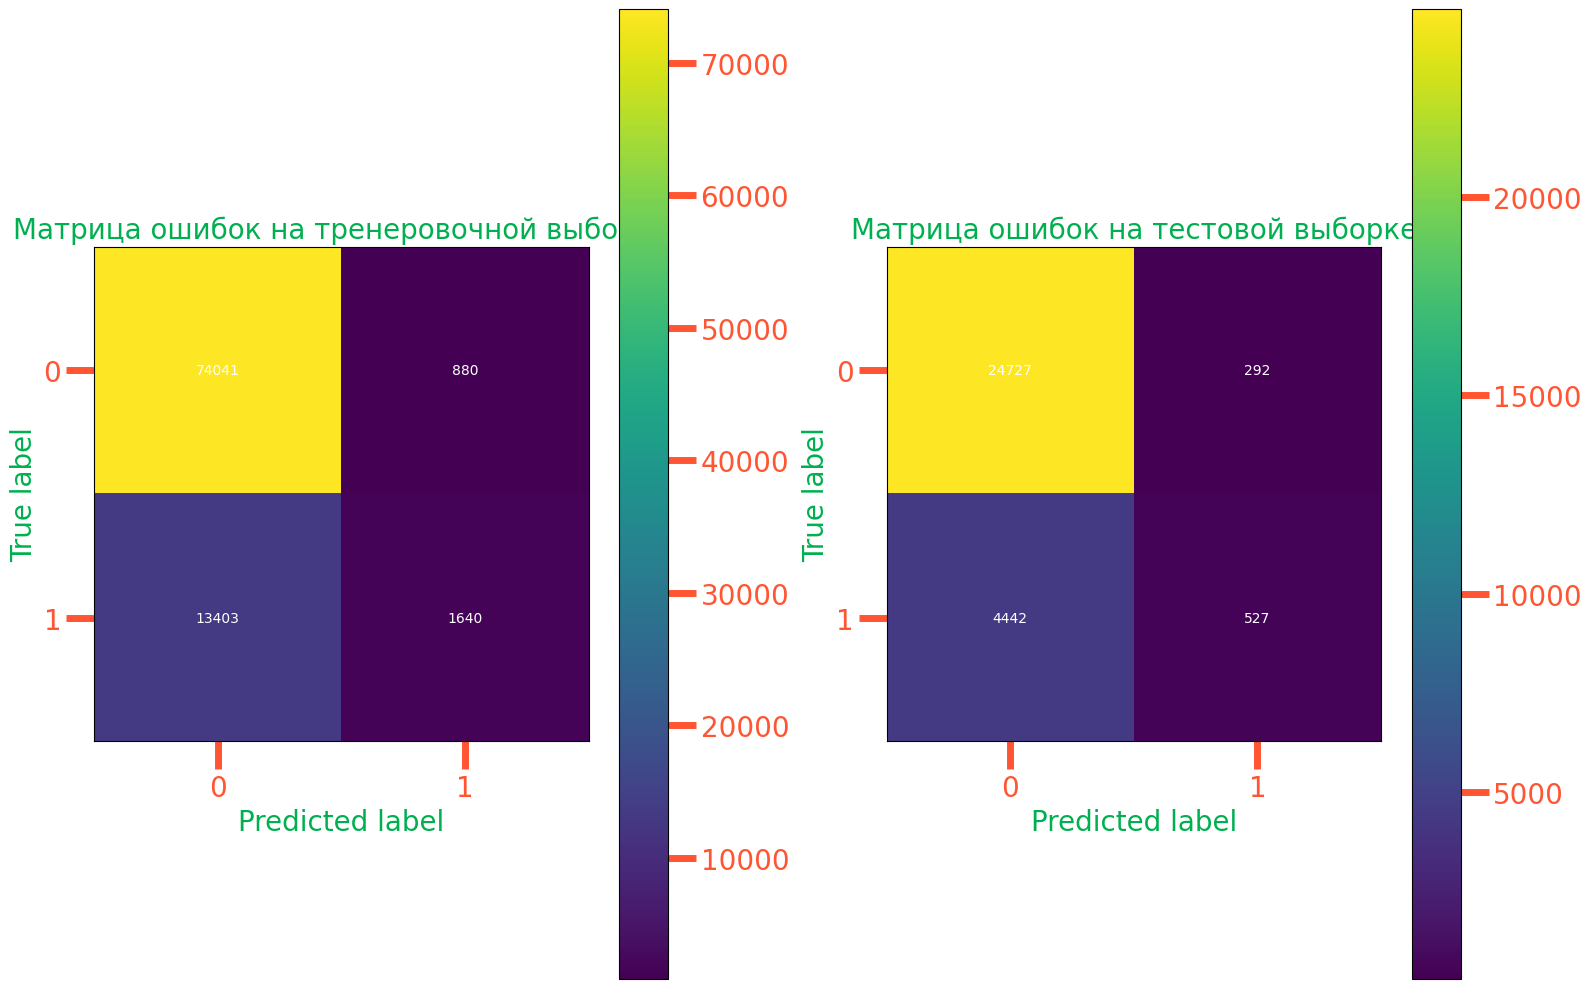

In [19]:
pipe.fit(X_train, y_train)
pred_test = pipe.predict(X_test)

### Your code is here
from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
fig.set_size_inches(16, 10)

cm_train = confusion_matrix(y_train, pipe.predict(X_train), labels=pipe.classes_)
cm_test = confusion_matrix(y_test, pipe.predict(X_test), labels=pipe.classes_)

cmp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cmp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)

ax_1 = fig.add_subplot(1, 2, 1)
cmp_train.plot(ax=ax_1, text_kw={'color': 'white'})

ax_2 = fig.add_subplot(1, 2, 2)
cmp_test.plot(ax=ax_2, text_kw={'color': 'white'})

fig.tight_layout()

ax_1.set(title='Матрица ошибок на тренеровочной выборке')
ax_2.set(title='Матрица ошибок на тестовой выборке')

plt.show()

**2.2)** Посчитайте стандартную метрику Accuracy на тестовой выборке c помощью матрицы ошибок. Напомним, что это просто доля верно предсказанных меток:
$
ACC = \dfrac{TP + TN}{TP + TN + FP + FN}
$.

(Не стоит переводить accuracy как точность, так как под точностью иногда еще понимают precision, который является совсем другим показателем! Лучше всегда использовать английские версии метрик, чтобы не возникало недопониманий. )

In [21]:
### Your code is here
accuracy = (24727 + 527) / (24727 + 527 + 292 + 4442)
print(f"Accuracy на тестовой выборке равна {accuracy:.3f}")

Accuracy на тестовой выборке равна 0.842


Мы ожидаем, что полученная accuracy совпадет с той, что была подсчитана во время использования функции `cross_validate`

Мы знаем, что accuracy не является хорошим показателем качества модели при несбалансированных классах. 

Допустим у нас 1000 объектов, где 990 имеют метку класса 0, а остальные 10 имеют метку 1. В нашем случае, класс 0 соответствует компьютерам, на которых нет вируса, а класс 1 - на которых есть. Тогда accuracy у константной модели, которая всегда предсказывает нулевой класс будет $0.99$, хотя задача как раз состоит в том, чтобы детектировать эти самые 10 объектов, которые соответствуют зараженным компьютерам. 

При несбалансированных выборках с помощью матрицы ошибок можно посчитать следующие метрики:

* **Precision** показывает "точность" попадания нашего классификатора в положительный класс, то есть долю правильно предсказанных положительных объектов среди всех **предсказанных** положительных объектов. 

* **Recall** показывает "полноту" предсказаний нашего классификатора, то есть долю правильно предсказанных положительных объектов среди всех **реальных** положительных объектов.

**2.3)** Посчитайте Precision и Recall с помощью матрицы ошибок. Потом сравните с реализацией в sklearn. Напомним формулы из лекции:

$$
Precision = \dfrac{TP}{TP + FP}, \quad Recall = \dfrac{TP}{TP + FN}
$$

In [28]:
from sklearn.metrics import recall_score, precision_score

### Your code is here
precision_train = 1640 / (1640 + 880)
precision_test = 527 / (527 + 292)
recall_train = 1640 / (1640 + 13403)
recall_test = 527 / (527 + 4442)
print(f"precision на тренеровчной выборке равен {precision_train:.3f}")
print(f"precision на тестовой выборке равен {precision_test:.3f}")
print(f"recall на тренеровчной выборке равен {recall_train:.3f}")
print(f"recall на тестовой выборке равен {recall_test:.3f}")
print()

print(f'Precision равно: {precision_score(y_test, pipe.predict(X_test)):.3f}')
print(f'Recall равно: {recall_score(y_test, pipe.predict(X_test)):.3f}')

precision на тренеровчной выборке равен 0.651
precision на тестовой выборке равен 0.643
recall на тренеровчной выборке равен 0.109
recall на тестовой выборке равен 0.106

Precision равно: 0.643
Recall равно: 0.106


Теперь картина кажется не такой уж лучезарной!

Вспомним, 

Метод `.predict` на самом деле берёт предсказанные вероятности для каждого класса и каждому объекту присваивает тот класс, у которого больше вероятность. 

Так как мы сейчас занимаемся бинарной классификацией, то большая вероятность определяется просто сравнением с порогом 0.5.

**2.4)** Воспользуйтесь методом `.predict_proba` и с помощью сравнения с порогом 0.5 постройте вектор предсказаний. Проверьте результат на ранее предсказанных метках, вектора должны совпадать.

In [29]:
### Your code is here
pred_probs = pipe.predict_proba(X_test)
np.all((pred_probs[:, 0] < 0.5) == pred_test)

np.True_

**Задание 3.**
Решим бизнес задачу. \
**3.1)** Допустим, заказчик требует, чтобы наш классификатор в 60% случаев правильно предсказывал наличие вируса на компьютере, чтобы не беспокоить клиентов из-за ложноположительных результатов. \
Как решить эту задачу? =>
Надо подобрать порог, который максимизирует `recall` при условии, что `precision > 0.6`.

$$
(recall | precision > 0.6) \to \max_{thres}
$$

In [30]:
from sklearn.metrics import precision_recall_curve

### Строим всевозможные комбинации precision, recall, threshold

precision, recall, thres = precision_recall_curve(y_test, pred_probs[:, 1])

### Находим такую тройку, при которой recall максимален, а precision > 0.6

ind = np.where(recall == recall[precision > 0.6].max())

print(f"Precison:\t {precision[ind][-1]}")
print(f"Recall: \t {recall[ind][-1]}")
print(f"Threshold:\t {thres[ind][-1]}")

Precison:	 0.6003734827264239
Recall: 	 0.12940229422418997
Threshold:	 0.4589487743790409


Теперь чтобы соответствовать установленным условиям, мы будем замерять вероятности для объектов и сравнивать и с найденным `Threshold`, который решает нашу задачу

**3.2)** Аналогично решите задачу, где заказчик требует, чтобы наш классификатор находил хотя бы 20% компьютеров с вирусом, среди всех действительно зараженных компьютеров.
$$
(precision | recall > 0.2) \to \max_{thres}
$$

In [31]:
### Your code is here
ind = np.where(precision == precision[recall > 0.2].max())

print(f"Precison:\t {precision[ind][-1]}")
print(f"Recall: \t {recall[ind][-1]}")
print(f"Threshold:\t {thres[ind][-1]}")

Precison:	 0.4928182268449728
Recall: 	 0.20024149728315557
Threshold:	 0.33128525155255834


**Задание 4.** На самом деле, можно объединить предыдущие две задачи и максимизировать взвешенную метрику, которая учитывает и Precision, и Recall. \
Посчитайте три такие метрики: среднее арифметическое, среднее геометрическое и минимум. 
1) Найдите порог, который их максимизирует. 
2) Выведите precision и recall, соответствующие этому порогу. 
3) Нарисуйте линии уровня для каждой из этих метрик, используя функцию `level_lines`. 
4) Изобразите точку $(recall, precision)$ соответствующую этому порогу на графике линий уровня.

$$
Arithm_{avg} = \dfrac{P + R}{2}, \quad Geom_{avg} = \sqrt{P \cdot R}, \quad Min = \min(P, R)
$$


In [51]:
def level_lines(func, name):
    x = np.linspace(0, 1.1, 100)
    y = np.linspace(0, 1.1, 100)

    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    plt.figure(figsize=(5, 5))
    plt.title(name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.contour(X, Y, Z, 15, cmap='plasma');

Precision:	 0.16993934409375963
Recall: 	 0.9979875226403703
Threshold:	 0.021913348366452697


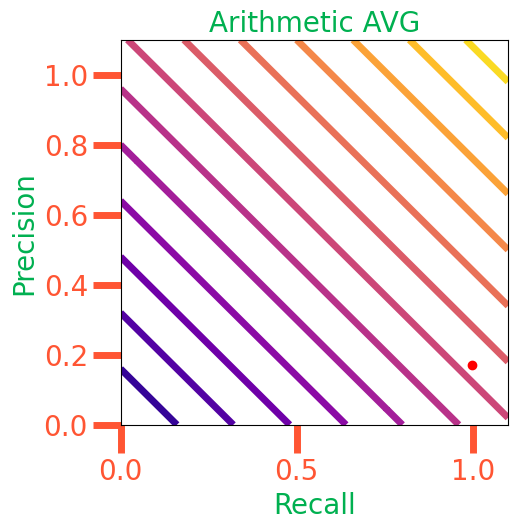

In [33]:
### Покажем на примере среднего арифметического, что должно у вас получиться

metric_func = lambda x, y: (x + y) / 2

arithm_idx = (metric_func(precision, recall)).argmax()

print(f"Precision:\t {precision[arithm_idx]}")
print(f"Recall: \t {recall[arithm_idx]}")
print(f"Threshold:\t {thres[arithm_idx]}")

level_lines(metric_func, "Arithmetic AVG")
plt.plot(recall[arithm_idx], precision[arithm_idx], 'ro');

Precision:	 0.22387976621207903
Recall: 	 0.809418394043067
Threshold:	 0.12601413817366527


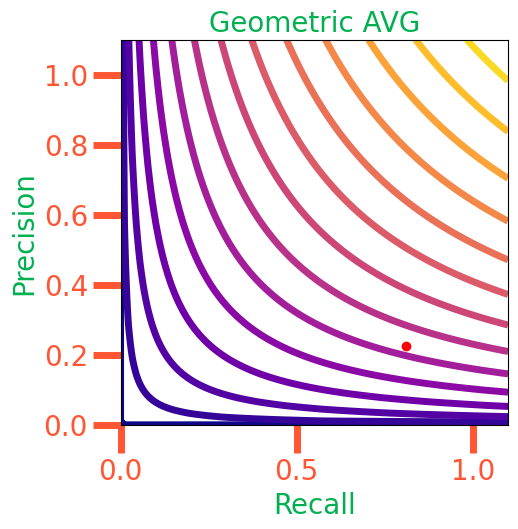

In [37]:
### Повторите для среднего геометрического
### Your code is here
metric_func = lambda x, y: (x * y) ** (1 / 2)

geom_idx = (metric_func(precision, recall)).argmax()

print(f"Precision:\t {precision[geom_idx]}")
print(f"Recall: \t {recall[geom_idx]}")
print(f"Threshold:\t {thres[geom_idx]}")

level_lines(metric_func, "Geometric AVG")
plt.plot(recall[geom_idx], precision[geom_idx], 'ro');

Precision:	 0.3586650583031765
Recall: 	 0.3590259609579392
Threshold:	 0.23662489521839236


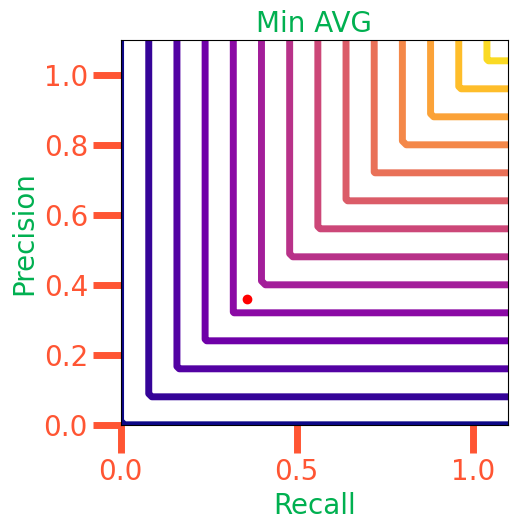

In [39]:
### Повторите для минимума
### Your code is here
metric_func = lambda x, y: np.minimum(x, y)

min_idx = (metric_func(precision, recall)).argmax()

print(f"Precision:\t {precision[min_idx]}")
print(f"Recall: \t {recall[min_idx]}")
print(f"Threshold:\t {thres[min_idx]}")

level_lines(metric_func, "Min AVG")
plt.plot(recall[min_idx], precision[min_idx], 'ro');

**Задание 5.** Одним из самых распространенных показателей качества является **F-мера**, которая обобщает все вышерассмотренные метрики. Более того, в ней можно регулировать параметр $\beta^2$, который отвечает за предпочтение между precision и recall. 
$$
F = \dfrac{(1 + \beta^2) P \cdot R}{\beta^2 P + R}
$$
* При $\beta^2 = 1$ и precision, и recall нам важны в равной степени.
* При $\beta^2 > 1$ предпочтение отдается recall. Похоже на решение задачи, где мы фиксируем приемлемое для нас значение precision и максимизируем recall.
* При $0 < \beta^2 < 1$ предпочтение отдается precision. Похоже на решение задачи, где мы фиксируем приемлемое для нас значение recall и максимизируем precision.

Найдите порог, который максимизирует:
1) F-меру с $\beta^2 = 1$,
2) F-меру с $\beta^2 = 0.05$,
3) F-меру с $\beta^2 = 4$.\
Для всех трех случаев выведите precision, recall, threshold и F-меру. 
Нарисуйте линии уровня и точку, которая максимизирует F-меру по аналогии с предыдущим пунктом.

Precision:	 0.2853228104790091
Recall: 	 0.523847856711612
Threshold:	 0.19267672583062792
F-score:	 0.3694294635254045


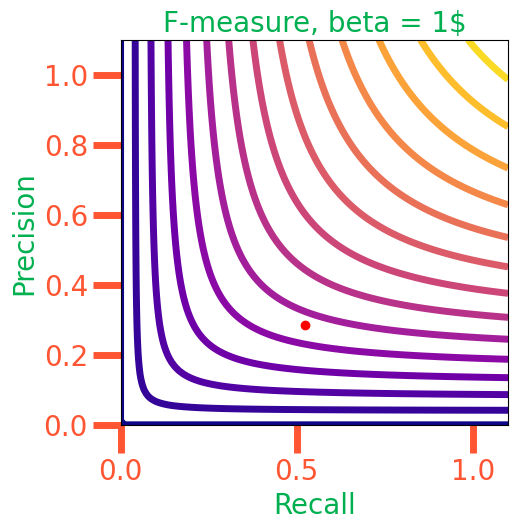

In [54]:
### Повторите для F-меры при \beta^2=1
### Выведите ее вместе с precision/recall/threshold
### Your code is here
precision, recall, thres = precision_recall_curve(y_test, pred_probs[:, 1])

metric_func = lambda x, y, b: (1 + b) * x * y / (b * x + y)

f_score_idx = (metric_func(precision, recall, 1)).argmax()

print(f"Precision:\t {precision[f_score_idx]}")
print(f"Recall: \t {recall[f_score_idx]}")
print(f"Threshold:\t {thres[f_score_idx]}")
print(f"F-score:\t {metric_func(precision[f_score_idx], recall[f_score_idx], 1)}")

level_lines(lambda x, y: 2 * x * y / (x + y), f"F-measure, beta = 1$")
plt.plot(recall[f_score_idx], precision[f_score_idx], 'ro');

Precision:	 0.642603550295858
Recall: 	 0.10927752062789294
Threshold:	 0.4973057964079163
F-score:	 0.18679050567595457


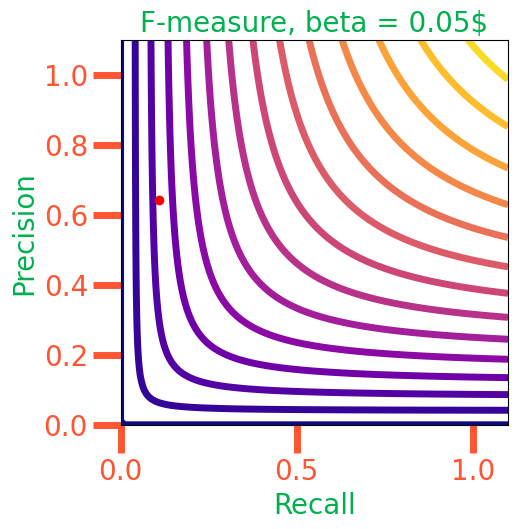

In [56]:
### Повторите для F-меры при \beta^2=0.05
### Выведите ее вместе с precision/recall/threshold
### Your code is here
b = 0.05
f_score_idx = (metric_func(precision, recall, b)).argmax()

print(f"Precision:\t {precision[f_score_idx]}")
print(f"Recall: \t {recall[f_score_idx]}")
print(f"Threshold:\t {thres[f_score_idx]}")
print(f"F-score:\t {metric_func(precision[f_score_idx], recall[f_score_idx], 1)}")

level_lines(lambda x, y: b * x * y / (x + y), f"F-measure, beta = 0.05$")
plt.plot(recall[f_score_idx], precision[f_score_idx], 'ro');


Precision:	 0.21052631578947367
Recall: 	 0.8597303280338097
Threshold:	 0.10928731456879957
F-score:	 0.338228890384387


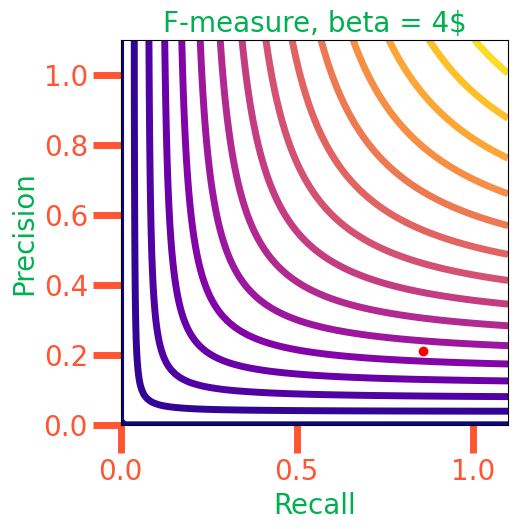

In [57]:
### Повторите для F-меры при \beta^2=4
### Выведите ее вместе с precision/recall/threshold
### Your code is here
b = 4
f_score_idx = (metric_func(precision, recall, b)).argmax()

print(f"Precision:\t {precision[f_score_idx]}")
print(f"Recall: \t {recall[f_score_idx]}")
print(f"Threshold:\t {thres[f_score_idx]}")
print(f"F-score:\t {metric_func(precision[f_score_idx], recall[f_score_idx], 1)}")

level_lines(lambda x, y: b * x * y / (x + y), f"F-measure, beta = 4$")
plt.plot(recall[f_score_idx], precision[f_score_idx], 'ro');